In [1]:
import pandas as pd
import yfinance as yf

# Fetch S&P 500 constituents from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(url)
sp500_df = tables[0]  # Assuming the first table contains the constituents
sp500_symbols = sp500_df["Symbol"].tolist()
sp500_symbols




['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [11]:
def check_crossover(symbol):
  data = yf.download(symbol, period="max")["Close"]
  # Ensure enough data for calculations
  if len(data) >= 51:  # Need at least 51 data points for 50-day SMA
    sma20 = data.rolling(window=20).mean()
    sma50 = data.rolling(window=50).mean()
    return (sma20.iloc[-1] > sma50.iloc[-1]) and (sma20.iloc[-2] <= sma50.iloc[-2])
  else:
    return False  # Not enough data for comparison
  
# Filter stocks with crossover
crossed_over_stocks = [symbol for symbol in sp500_symbols if check_crossover(symbol)]

# Print the results
print("Stocks with 20 SMA crossover over 50 SMA:")
print(*crossed_over_stocks, sep="\n")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1925-03-30 -> 2024-03-06)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [7]:

def check_indicators(symbol, rsi_threshold=70, macd_threshold=0):
  """
  Downloads data for the given symbol, calculates RSI and MACD indicators,
  and checks if they meet the specified thresholds.

  Args:
      symbol: The stock symbol
      rsi_threshold: RSI threshold (default: 70)
      macd_threshold: MACD threshold (default: 0)

  Returns:
      A dictionary containing:
          - 'symbol': The stock symbol
          - 'rsi_above_threshold': True if RSI is above threshold, False otherwise
          - 'macd_above_threshold': True if MACD (fast line) is above threshold, False otherwise
          - 'data': The downloaded stock data (Close price)
  """
  data = yf.download(symbol, period="max")["Close"]

  if len(data) < 51:  # Check for enough data
    return {
        "symbol": symbol,
        "rsi_above_threshold": False,
        "macd_above_threshold": False,
        "data": None,
    }

  # Calculate indicators
  delta = data.diff()
  delta = delta[1:]  # Ignore the first difference
  up, down = delta.copy(), delta.copy()
  up[up < 0] = 0
  down[down > 0] = 0
  rs = up.ewm(alpha=14, min_periods=14, adjust=False).mean() / down.ewm(alpha=14, min_periods=14, adjust=False).mean()
  rsi = 100 - 100 / (1 + rs)

  # Calculate MACD (using EMA instead of SMA for efficiency)
  ema12 = data.ewm(alpha=12, min_periods=12, adjust=False).mean()
  ema26 = data.ewm(alpha=26, min_periods=26, adjust=False).mean()
  macd = ema12 - ema26
  signal_line = macd.ewm(alpha=9, min_periods=9, adjust=False).mean()

  # Check thresholds
  rsi_above_threshold = rsi.iloc[-1] > rsi_threshold
  macd_above_threshold = macd.iloc[-1] > macd_threshold

  return {
      "symbol": symbol,
      "rsi_above_threshold": rsi_above_threshold,
      "macd_above_threshold": macd_above_threshold,
      "data": data,
  }


filtered_stocks = []
for symbol in sp500_symbols:
  result = check_indicators(symbol)
  if result["rsi_above_threshold"] and result["macd_above_threshold"]:
    filtered_stocks.append(result)

print("Filtered Stocks:")
for stock in filtered_stocks:
  print(f"- {stock['symbol']}: RSI: {stock['data'].iloc[-1]:.2f}, MACD: {macd.iloc[-1]:.2f}")

[*********************100%%**********************]  1 of 1 completed


ValueError: alpha must satisfy: 0 < alpha <= 1

In [8]:
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2020, 5, 24)             # accepts strings
end = datetime(2023, 5, 24) # or datetime objects
yahoo= web.DataReader('SPY', 'yahoo',start=start, end=end)
yahoo.info()

TypeError: string indices must be integers

In [29]:
df = yf.download("SPY",
                 period="9mo",
                 interval="1h",
                 progress=False)


In [1]:
import yahooquery as yq
data = yq.get_trending()
data


{'count': 20,
 'quotes': [{'symbol': 'BTC-USD'},
  {'symbol': 'COIN'},
  {'symbol': 'MSTR'},
  {'symbol': 'MARA'},
  {'symbol': 'ETH-USD'},
  {'symbol': 'CNI'},
  {'symbol': 'PIK'},
  {'symbol': 'IBIT'},
  {'symbol': 'CLSK'},
  {'symbol': 'BTC-CAD'},
  {'symbol': 'RIOT'},
  {'symbol': 'AMLX'},
  {'symbol': 'TCBP'},
  {'symbol': 'DUO'},
  {'symbol': 'BA'},
  {'symbol': 'GBTC'},
  {'symbol': 'BITF'},
  {'symbol': 'LXRX'},
  {'symbol': 'BITO'},
  {'symbol': 'UMAC'}],
 'jobTimestamp': 1710159031950,
 'startInterval': 202403111100}

In [9]:
data = yq.search("fisker", news_count=10)
data


{'explains': [],
 'count': 15,
 'quotes': [{'exchange': 'NYQ',
   'shortname': 'Fisker Inc.',
   'quoteType': 'EQUITY',
   'symbol': 'FSR',
   'index': 'quotes',
   'score': 26156.0,
   'typeDisp': 'Equity',
   'longname': 'Fisker Inc.',
   'exchDisp': 'NYSE',
   'sector': 'Consumer Cyclical',
   'sectorDisp': 'Consumer Cyclical',
   'industry': 'Auto Manufacturers',
   'industryDisp': 'Auto Manufacturers',
   'dispSecIndFlag': True,
   'isYahooFinance': True,
   'prevName': 'Fisker, Inc.',
   'nameChangeDate': '2024-03-05'},
  {'exchange': 'MUN',
   'shortname': 'FISKER INC. CL.A  O.N.',
   'quoteType': 'EQUITY',
   'symbol': 'FIS.MU',
   'index': 'quotes',
   'score': 20102.0,
   'typeDisp': 'Equity',
   'longname': 'Fisker Inc.',
   'exchDisp': 'Munich',
   'isYahooFinance': True,
   'prevName': 'Fisker, Inc.',
   'nameChangeDate': '2024-03-05'},
  {'exchange': 'FRA',
   'shortname': 'FISKER INC. CL.A  O.N.',
   'quoteType': 'EQUITY',
   'symbol': 'FIS.F',
   'index': 'quotes',
   '

C:\Users\pthon\anaconda3\envs\ta_env\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


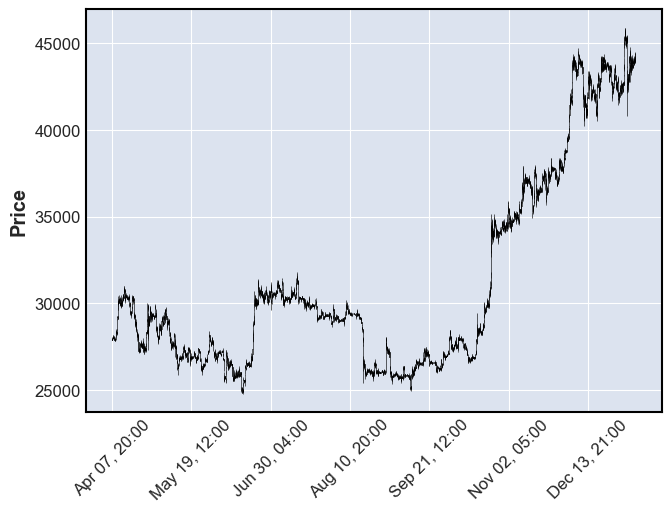